# CD Purchase Behavior Prediction Models 

This study is to build a CD purchase behavior prodiction model to help the agents to decide whether to contact a customer who has the possibility to buy a CD. A training data and a test data are collected. The training data contains a set of candidate prodictors, which consists of both numerica and categorial data. Our goal is to sellect the best prodiction model out of several candidate models, such linear regression (additive model), support vector machines (with different kernels) and the lasso model. The framework mainly consists of 3 steps. Step 1: varaible selection (find the best subset of predictors); Step 2: Model assessment (run different models and compare their fitting and prediction performances); Step 3: Use cross-validation to select the best model (or tunning parameter). 

Our work is committed and posted at Jupyter, with coding in R. We first download the entire data set "Archive.zip" to a temp file, unzip them and read them in R.

In [1]:
library(googledrive)

Warning message:
"package 'googledrive' was built under R version 3.4.3"

In [2]:
temp <- tempfile(fileext = ".zip")

In [3]:
dl <- drive_download(as_id("1AiZda_1-2nwrxI8fLD0Y6e5rTg7aocv0"), path = temp, overwrite = TRUE)

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=603366585132-nku3fbd298ma3925l12o2hq0cc1v8u11.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=DnjXqWNKp9
Authentication complete.
File downloaded:
  * Archive.zip
Saved locally as:
  * C:\Users\ssorc\AppData\Local\Temp\RtmpOGL126\file3eb450956389.zip


In [12]:
out <- unzip(temp, exdir = tempdir())

The test dataset is called "bank".

In [13]:
bank <- read.csv(out[14], sep = ";", head = TRUE)
# test data


The training dataset is called "bank.full".

In [14]:
bank.full <- read.csv(out[12], sep = ";", head = TRUE)
# training data

We clean the raw datasets. namely, we check if there is missing data, denoted by "NA". If yes we omit the corresponding rows. 

In [15]:
library(ISLR)

In [9]:
names(bank)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [10]:
sum(is.na(bank))
# Check the data set. There is no missing data.

[1] 0

In [11]:
sum(is.na(bank.full))

[1] 0

## Question 2: which features are more likely to lead to CD purchase?

In machine learning, this is regarded to be a subset predictors selection  problem. A classical method is called subset selection method. The approach consists of best subset selection, forwward stepwise selection and backward stepwise selection. Here due to the large volume of our training data, we select the forward stepwise selection to have a better program running speed. 

**Step 1: Forward stepwise subset selection**

The R package "leaps" is needed.

In [17]:
library(leaps)

Run the forward stepwise selection. By using a classic multiple linear regression, we found that the two features "loan" and "housing" are highly correlated. Then we run twice the selection model: one is to exclude "loan", the other is to exclude "housing".

Below we run the forward subset selection with "loan" excluded. we choose to select up to 45 features and subfeatures.

In [20]:
regfit.fwd1 = regsubsets(y~ age + job + marital + education+ default + housing + contact 
                        + month + day_of_week + duration + campaign + pdays + previous 
                        + poutcome + emp.var.rate + cons.price.idx + cons.conf.idx 
                        + euribor3m + nr.employed, bank.full, nvmax = 45, method="forward")
# Do forward stepwise subset selection 

The code below outputs the selection result. From the first "forced in - forced out" table, we see there is no predictor should be absolutely included or excluded. The second table tells if i features are selected to explain the CD purchase behavior, then which i features (marded with *) should be chosen.

In [21]:
summary(regfit.fwd1)

Subset selection object
Call: regsubsets.formula(y ~ age + job + marital + education + default + 
    housing + contact + month + day_of_week + duration + campaign + 
    pdays + previous + poutcome + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed, bank.full, nvmax = 45, 
    method = "forward")
51 Variables  (and intercept)
                             Forced in Forced out
age                              FALSE      FALSE
jobblue-collar                   FALSE      FALSE
jobentrepreneur                  FALSE      FALSE
jobhousemaid                     FALSE      FALSE
jobmanagement                    FALSE      FALSE
jobretired                       FALSE      FALSE
jobself-employed                 FALSE      FALSE
jobservices                      FALSE      FALSE
jobstudent                       FALSE      FALSE
jobtechnician                    FALSE      FALSE
jobunemployed                    FALSE      FALSE
jobunknown                       FALSE     

Below we run the forward subset selection without the feature "housing".

In [22]:
regfit.fwd2 = regsubsets(y~ age + job + marital + education+ default + loan + contact 
                        + month + day_of_week + duration + campaign + pdays + previous 
                        + poutcome + emp.var.rate + cons.price.idx + cons.conf.idx 
                        + euribor3m + nr.employed, bank.full, nvmax = 45, method="forward")

In [23]:
summary(regfit.fwd2)

Subset selection object
Call: regsubsets.formula(y ~ age + job + marital + education + default + 
    loan + contact + month + day_of_week + duration + campaign + 
    pdays + previous + poutcome + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed, bank.full, nvmax = 45, 
    method = "forward")
51 Variables  (and intercept)
                             Forced in Forced out
age                              FALSE      FALSE
jobblue-collar                   FALSE      FALSE
jobentrepreneur                  FALSE      FALSE
jobhousemaid                     FALSE      FALSE
jobmanagement                    FALSE      FALSE
jobretired                       FALSE      FALSE
jobself-employed                 FALSE      FALSE
jobservices                      FALSE      FALSE
jobstudent                       FALSE      FALSE
jobtechnician                    FALSE      FALSE
jobunemployed                    FALSE      FALSE
jobunknown                       FALSE      FA

Comparing the 2 forward selection results, we found that the feature "loan" has little impact on the response variable so we prefer the first selection model than the second one. Next, we use the criteria r square, adjusted r square, Cp value and AIC value to select the best number of predictors, out of the output from the second selection model.

In [31]:
regfit.fwd <- regfit.fwd1

In [32]:
reg.summary <- summary(regfit.fwd)

Output ajusted r square. The best subset chosen by the adjr2 value contains 36 members.

In [33]:
max.adjr2 <- which.max(reg.summary$adjr2)

In [34]:
max.adjr2

[1] 36

Output the Cp value. we see the best subset chosen by the Cp value contains 30 predictors.

In [35]:
min.cp <- which.min(reg.summary$cp)

In [36]:
min.cp

[1] 30

Output the BIC. The best subset chosen according to BIc contains 22 members.

In [37]:
min.bic <- which.min(reg.summary$bic)

In [38]:
min.bic

[1] 22

Below we illustrate the best subset chosen by the 4 criteria respectively.

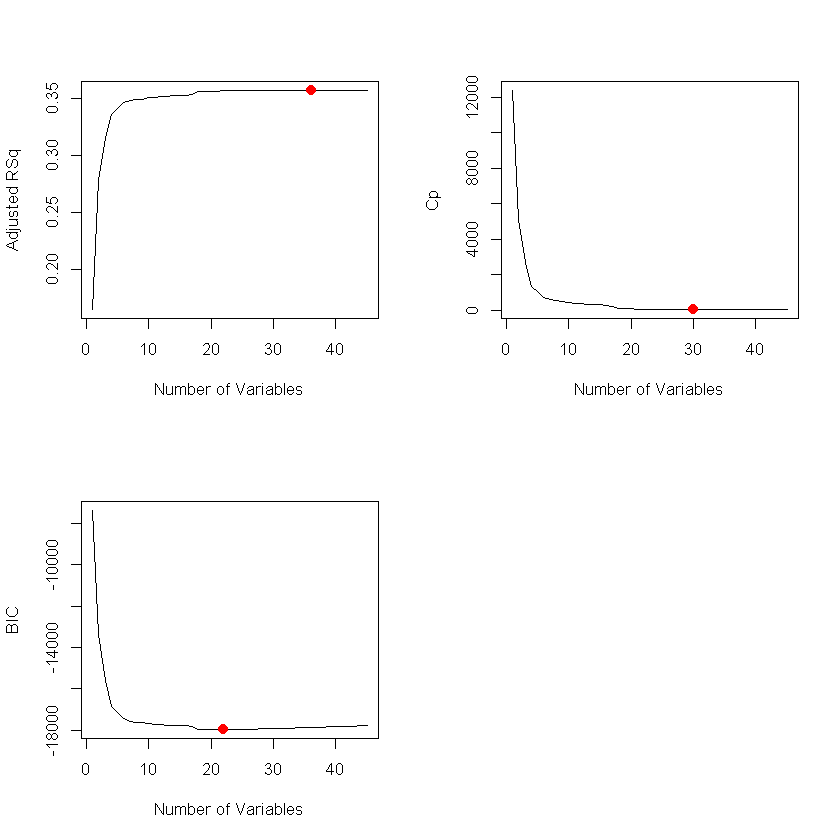

In [41]:
par(mfrow = c(2,2))
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
points(max.adjr2, reg.summary$adjr2[max.adjr2], col = "red", cex = 2, pch = 20)
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(min.cp, reg.summary$cp[min.cp], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(min.bic, reg.summary$bic[min.bic], col = "red", cex = 2, pch = 20)

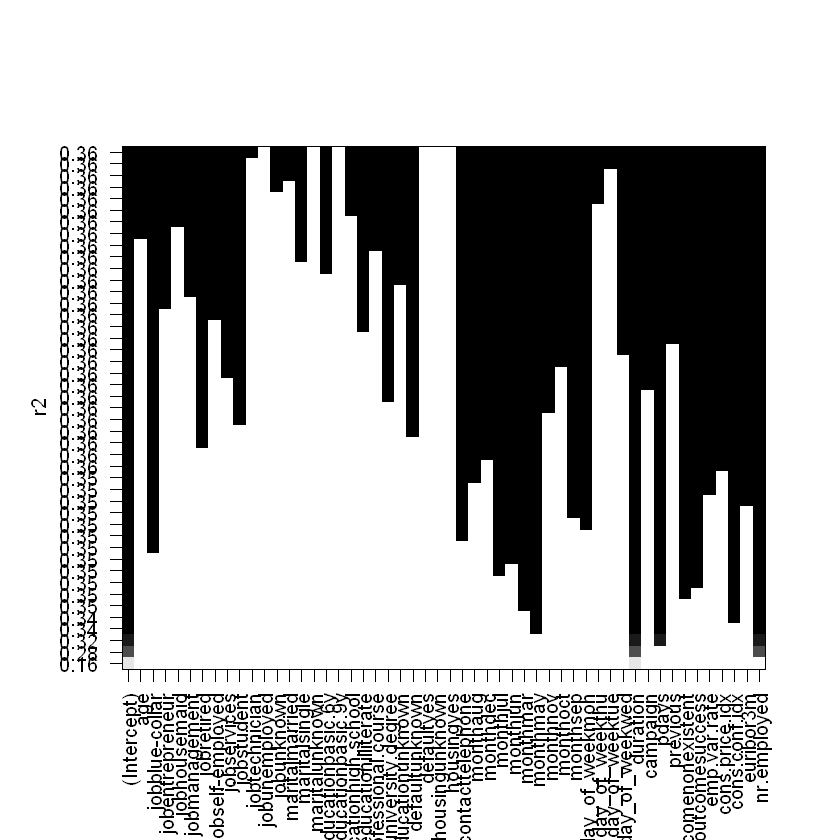

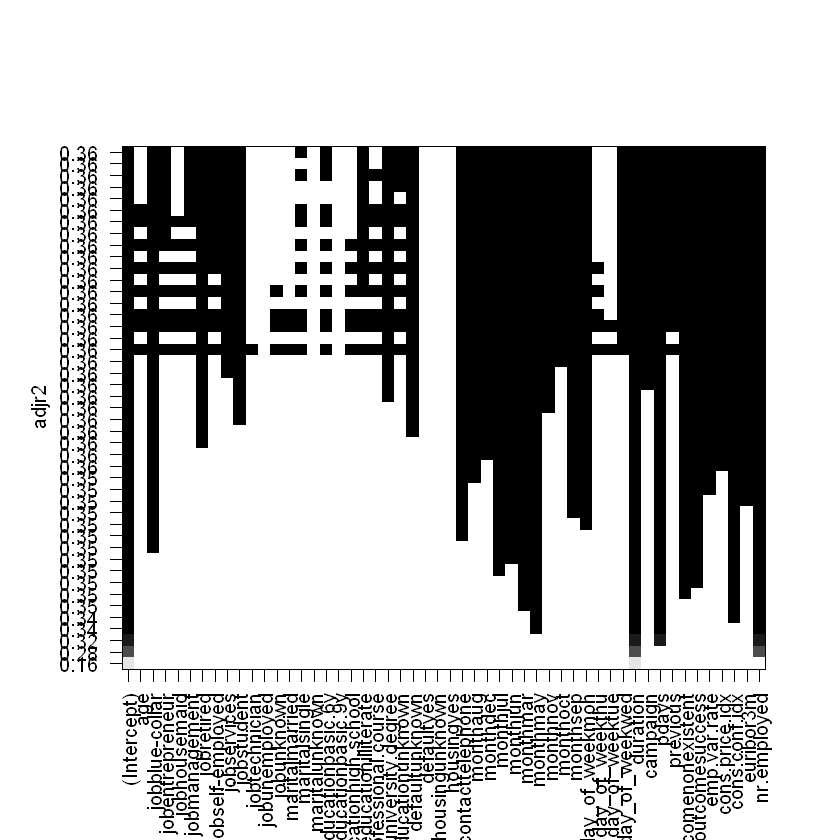

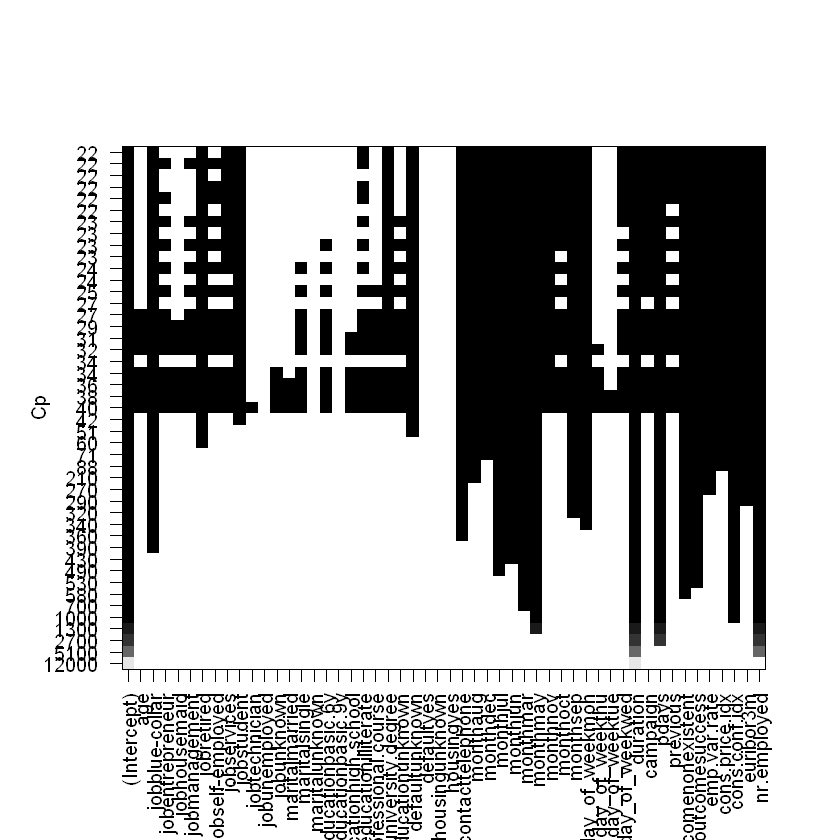

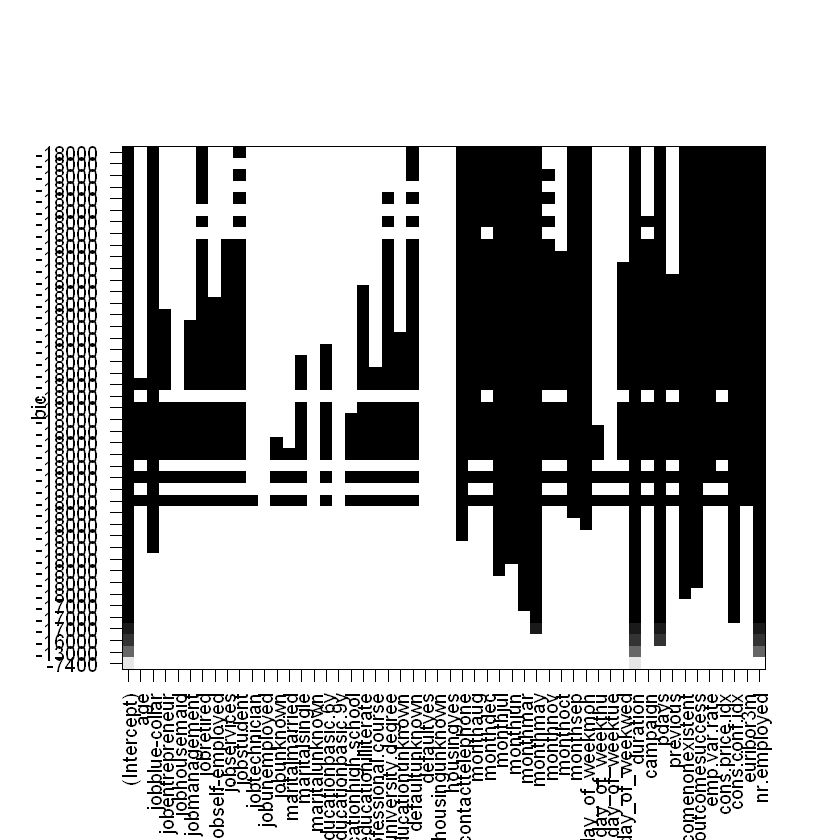

In [42]:
plot(regfit.fwd, scale = "r2")
plot(regfit.fwd, scale = "adjr2")
plot(regfit.fwd, scale = "Cp")
plot(regfit.fwd, scale = "bic")

Here we choose the subset containing 30 members, since it is flexible enough compared to the 22-member one and it is more efficient in prediction, compared to the 36-member one. The prediction equation's coefficients of the best subset predictors are given below. 

In [43]:
coef(regfit.fwd, 30)

(Intercept)             jobblue-collar 
             -1.884542e+01              -1.243272e-02 
                jobretired                jobservices 
              2.613397e-02              -7.620923e-03 
                jobstudent        educationilliterate 
              3.091558e-02               8.604080e-02 
educationuniversity.degree             defaultunknown 
              7.737628e-03              -1.032189e-02 
          contacttelephone                   monthaug 
             -4.802182e-02               1.181457e-01 
                  monthdec                   monthjul 
              7.896931e-02               4.139200e-02 
                  monthjun                   monthmar 
             -3.676078e-02               2.836133e-01 
                  monthmay                   monthnov 
             -3.116598e-02              -1.615860e-02 
                  monthoct                   monthsep 
              2.199669e-02               3.330650e-02 
            day_of_weekmon             day_of_weekwed 
             -1.539561e-02               5.289905e-03 
                  duration                   campaign 
              4.659125e-04               9.641329e-04 
                     pdays                   previous 
             -1.664965e-04              -9.127433e-03 
       poutcomenonexistent            poutcomesuccess 
              3.545748e-02               1.654809e-01 
              emp.var.rate             cons.price.idx 
             -1.809218e-01               2.209842e-01 
             cons.conf.idx                  euribor3m 
              3.250967e-03               6.792398e-02 
               nr.employed 
             -1.565872e-04

**Step 2: do logistic regression.**

In [44]:
logisticMod <- glm(y ~ job + education + default + contact + month + day_of_week + duration
                + campaign + pdays + previous + poutcome + emp.var.rate + cons.price.idx
                + cons.conf.idx + euribor3m + nr.employed, data = bank.full,
               family = binomial)

The output is summarized below. We see that only part of the features are significantly (marked in *) explaining the CD purchase behavior.

In [45]:
summary(logisticMod)


Call:
glm(formula = y ~ job + education + default + contact + month + 
    day_of_week + duration + campaign + pdays + previous + poutcome + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed, family = binomial, data = bank.full)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.9943  -0.2982  -0.1855  -0.1344   3.3668  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -2.369e+02  3.827e+01  -6.190 6.03e-10 ***
jobblue-collar               -2.368e-01  7.965e-02  -2.973 0.002949 ** 
jobentrepreneur              -1.872e-01  1.254e-01  -1.493 0.135440    
jobhousemaid                 -2.898e-02  1.468e-01  -0.197 0.843481    
jobmanagement                -6.791e-02  8.440e-02  -0.805 0.421055    
jobretired                    2.761e-01  9.150e-02   3.018 0.002549 ** 
jobself-employed             -1.597e-01  1.178e-01  -1.356 0.175065    
jobservices                  -1.4

**Conclusion:** A customer is more likely to buy a CD if his or her:
* type of job is "retired" or "student",
* educaiton is "university degree",
* last contact month of year is March, August or September,
* last contact day of the week is Wednesday,
* number of contacts performed during this campaign is relatively small,
* outcome of the previous marketing campaign is "success" or "nonexistent", 
* employment variation rate is relatively small,
* consumer price index is relatively high,
* consumer confidence indes is relatively high,
* euribor 3 month rate is relatively high.

Below we test our logistic regression model on the test dataset. A confusion matrix is given to tell the prediction performance of the model.

In [48]:
pred_logistic <- round(predict(logisticMod, bank, type = "response"))

In [49]:
table(pred_logistic, bank$y)

             
pred_logistic   no  yes
            0 3570  258
            1   98  193

Conclusion: the logistic regression predicts correctly most of the "no" but less than half of the "yes". This reveals the facts that most of the training responses are "no", and the logistic regression model is not satisfactory in this case. Next step we try support vector machines approaches, that are more flexible than logistic regression.

## Question 3 : Build several predictive classifiers using different types of machine learning models/algorithms

Use support vector machines to predict CD purchase behavior.

We first prepare our training dataset to be able to run the svm() function in R.

In [50]:
xTrain <- bank.full[c(2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]

In [55]:
xTrain <- data.matrix(xTrain, rownames.force = NA)

In [56]:
yTrain <- bank.full[dim(bank.full)[2]]

In [57]:
n <- dim(yTrain)[1]

In [58]:
yTrain <- (yTrain[,1] == "yes")

In [59]:
for(i in 1: n){
    if (yTrain[i] == TRUE){
        yTrain[i] = 1}
    else{yTrain[i] = -1}
}

In [60]:
datTrain <- data.frame(X = xTrain, Y = as.factor(yTrain))

The package "e1071" is needed to index the function svm(). 

In [61]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.4.3"

We first try to run svm with linear kenel. Note that it is equivalent to logistic regression so the performance (see the confusion table below) is unsurprisingly similar to that of logistic regression.

In [62]:
svmfit_linear <- svm (Y~., data = datTrain, kernel = "linear", cost = 10, scale = FALSE)

In [63]:
summary(svmfit_linear)


Call:
svm(formula = Y ~ ., data = datTrain, kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0625 

Number of Support Vectors:  5185

 ( 2593 2592 )


Number of Classes:  2 

Levels: 
 -1 1




In [64]:
xTest <- bank[c(2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]

In [65]:
xTest <- data.matrix(xTest, rownames.force = NA)

In [66]:
yTest <- bank[dim(bank)[2]]

In [67]:
n <- dim(yTest)[1]

In [ ]:
yTest <- (yTest[,1] == "yes")

In [ ]:
for(i in 1: n){
    if (yTest[i] == TRUE){
        yTest[i] = 1}
    else{yTest[i] = -1}
}

In [ ]:
datTest <- data.frame(X = xTest, Y = as.factor(yTest))

In [ ]:
yPred_linear <- predict(svmfit_linear, datTest)

In [ ]:
table(predict = yPred_linear, truth = datTest$Y)

Next we try the svm with polynomial kernel. we see from the confusion matrix below that it is not better than the linear kernel svm.

In [493]:
svmfit_polynomial <- svm (Y~., data = datTrain, kernel = "polynomial", cost = 10, scale = FALSE)

In [494]:
yPred_polynomial <- predict(svmfit_polynomial, datTest)

In [495]:
table(predict = yPred_poly, truth = datTest$Y)

       truth
predict   -1    1
     -1 3599  297
     1    69  154

The sigmoid kernel svm below is even worse.

In [496]:
svmfit_sigmoid <- svm (Y~., data = datTrain, kernel = "sigmoid", cost = 10, scale = FALSE)

In [497]:
yPred_sigmoid <- predict(svmfit_sigmoid, datTest)

In [498]:
table(predict = yPred_sigmoid, truth = datTest$Y)

       truth
predict   -1    1
     -1 3668  451
     1     0    0

Finally we found that the radial kernel svm below has a great performance: it has misclassified 2 points only.

In [499]:
svmfit_radial <- svm (Y~., data = datTrain, kernel = "radial", cost = 10, scale = FALSE)

In [500]:
yPred_radial <- predict(svmfit_radial, datTest)

In [501]:
table(predict = yPred_radial, truth = datTest$Y)

       truth
predict   -1    1
     -1 3667    1
     1     1  450

Conclusion: we believe that the support vector machines with radial kernel is the most promising model among logistic regression, svm with linear, polynomial, sigmoid and radial kernels.

Question 4: use the cross-validation to select the best model.

Note that in the above tests, we have set the tunning parameter "cost" to be a constant 10. It is possible to use the K-fold cross-validation approach to determine the best "cost" value in the svm with radial kernel. To this end we use the following codes.

In [70]:
set.seed(1)

In [ ]:
tune.out <- tune(svm, Y~., data = datTrain, kernel = "radial", 
                 ranges = list(cost = c(.1, 1, 10 ,100, 100), gamma = c(.5, 1, 2, 3, 4)))

In [ ]:
summary(tune.out)